<a href="https://colab.research.google.com/github/Newcoder-Rudra/Black-Friday-data-analysis/blob/main/MajorProj_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import tensorflow as tf

In [24]:
data = pd.read_csv("yahoo_stock.csv")

data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [25]:
data.shape

(1825, 7)

In [26]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03,1825.000000
mean,2660.718673,2632.817580,2647.704751,2647.856284,3.869627e+09,2647.856284
std,409.680853,404.310068,407.169994,407.301177,1.087593e+09,407.301177
min,1847.000000,1810.099976,1833.400024,1829.079956,1.296540e+09,1829.079956
25%,2348.350098,2322.250000,2341.979980,2328.949951,3.257950e+09,2328.949951
50%,2696.250000,2667.840088,2685.489990,2683.340088,3.609740e+09,2683.340088
75%,2930.790039,2900.709961,2913.860107,2917.520020,4.142850e+09,2917.520020
max,3645.989990,3600.159912,3612.090088,3626.909912,9.044690e+09,3626.909912



**EDA**


In [27]:
data.isnull().sum()

,0
Date,0
High,0
Low,0
Open,0
Close,0
Volume,0
Adj Close,0


**Date parsing and indexing**

In [28]:
data["Date"] = pd.to_datetime(data["Date"])

In [29]:
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


**Time Series visualization using interactive graphs**

In [30]:
fig = px.line(data, x="Date", y="Close", title="Close Price Over Time")

# Customize the background color
fig.update_layout(plot_bgcolor='rgba(0, 0, 0, 0)')

# Customize the line color
fig.update_traces(line=dict(color="rgb(128, 0, 128)"))
fig.update_layout(width=800, height=400)

# Show the plot
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




**Volume Analysis**

In [31]:
fig = px.line(data, x="Date", y="Volume", title="Trading Volume Over Time")

# Customize the background color
fig.update_layout(plot_bgcolor='rgba(0, 0, 0, 0)')

# Customize the line color
fig.update_traces(line=dict(color="rgb(128, 0, 128)"))

# Set a wider figure size (adjust the width and height as needed)
fig.update_layout(width=800, height=400)

# Show the plot
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



**Rolling Statistics**

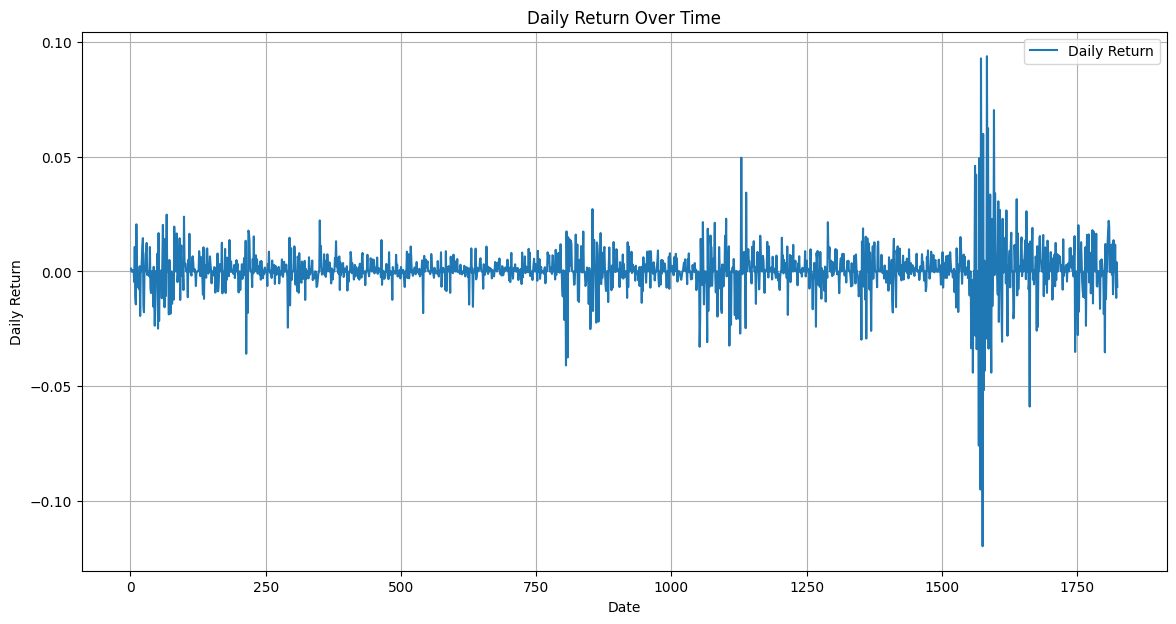

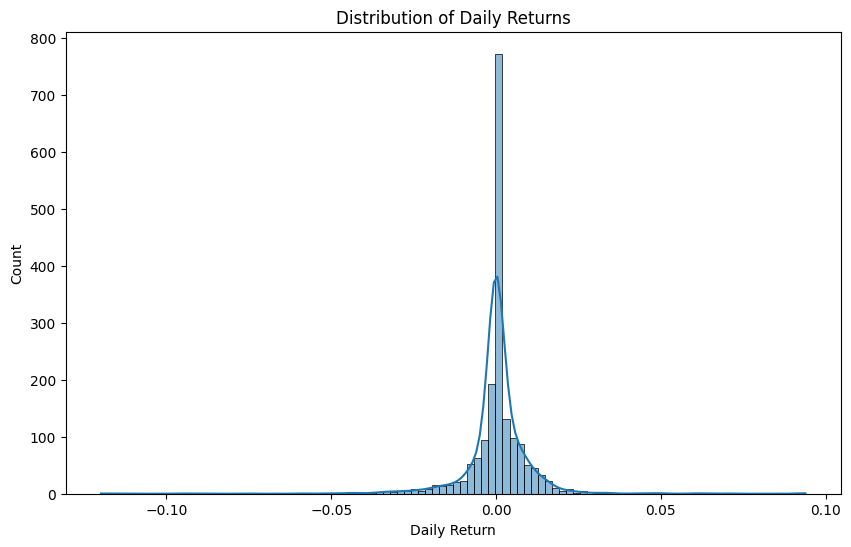

In [32]:
data["Daily Return"] = data["Close"].pct_change()
plt.figure(figsize=(14,7))
plt.plot(data["Daily Return"],label="Daily Return")
plt.title("Daily Return Over Time")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10,6))
sns.histplot(data['Daily Return'].dropna(), bins=100, kde=True)
plt.title('Distribution of Daily Returns')
plt.show()

**Seasonal Decomposition for separating the time series into trend, seasonality, and residual components**

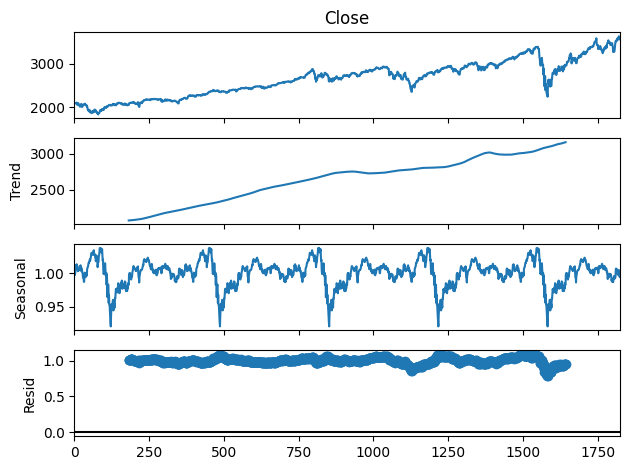

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data["Close"],model="multiplicative",period=365)
result.plot()
plt.show()

**Some Correlation Analysis**

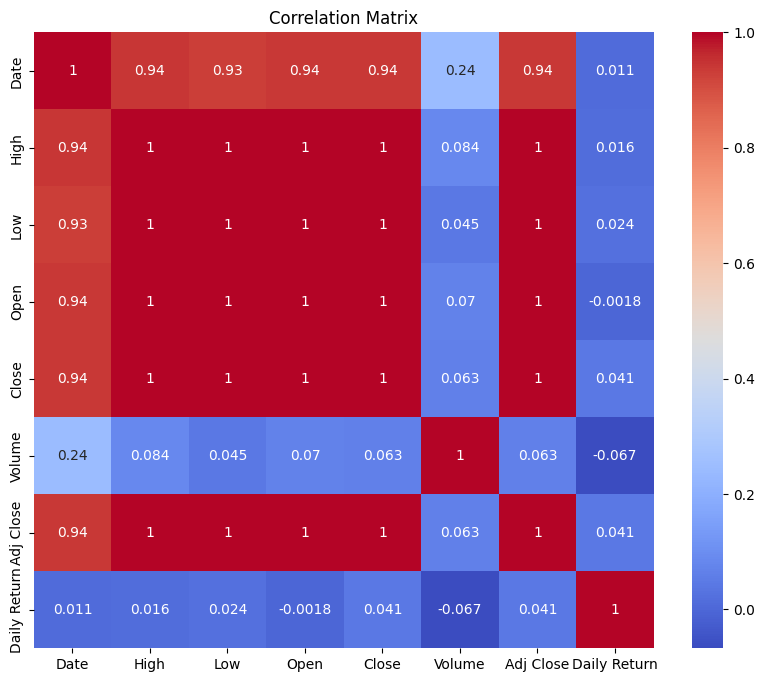

In [34]:
corr_matrix =data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

**LSTM Time Series Forcasting**

**prepare Data**

In [35]:
from sklearn.preprocessing import MinMaxScaler

close_data = data[["Close"]]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_data)

# Create sequences for LSTM
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequences), np.array(labels)

sequence_length = 50
X, y = create_sequences(scaled_data, sequence_length)

In [36]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

**Bulid and Complie the LSTM (RNN) Model**

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, activation = "relu", input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1225 - val_loss: 0.0151
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0023 - val_loss: 0.0134
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.0473e-04 - val_loss: 0.0103
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5.3298e-04 - val_loss: 0.0087
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.4648e-04 - val_loss: 0.0068
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 4.5669e-04 - val_loss: 0.0038
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 3.6304e-04 - val_loss: 0.0032
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.2604e-04 - val_loss: 0.0033
Epoch 9/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.3755e-04 - val_loss: 0.0033
Epoch 10/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.3212e-04 - val_loss: 0.0032
Epoch 11/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.3356e-04 - val_loss: 0.0030
Epoch 12/20
45/45 ━━━━━━━━━

In [39]:
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0024
Test Loss: 0.002418296178802848


In [40]:
# Make predictions
y_pred = model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [41]:
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

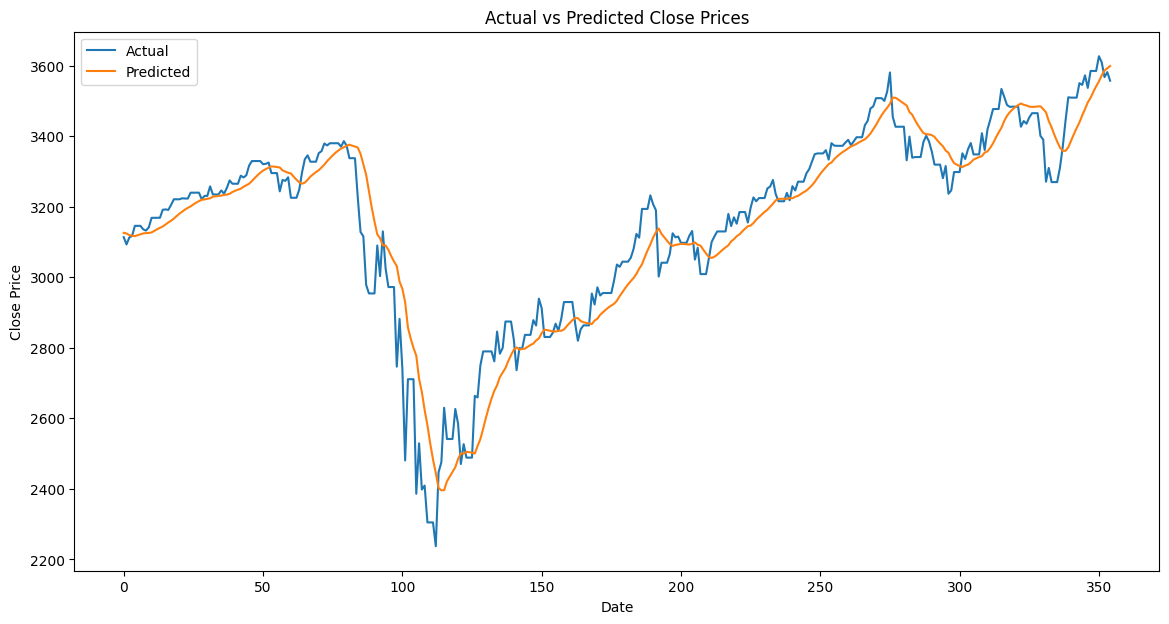

In [42]:
plt.figure(figsize=(14,7))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()